# Time Series Data

![](banner_time_series.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
update_geom_defaults("line", list(color="black", size=0.15))

.................................................... start of document ....................................................

## Introduction

Motivation, context, history, related topics ...

## Synopsis

**Terms**

* **Time Series Data:**  The order of observations in **time series data** is significant.  In general, data analytic methods do not work on time series data because they do not respect the order of observations. 

* **Cross-Sectional Data:**  The order of observations in **cross-sectional data** is not significant.  In general, data analytic methods do work on cross-sectional data.

* **Time Variable:**  A variable (if it exists) that indexes the order of time series data.
* **Viewpoint:**  The time step at which a prediction is made about subsequent time steps.
* **View:**  An observation comprising variables with information about prior time steps, a viewpoint, and/or subsequent time steps.

## Exposition

### Data

In [2]:
data = read.csv("London agg.csv", colClasses=c("Date", "numeric"))
colnames(data) = c("day", "outcome")
size(data)
data

observations,variables
396,2


day,outcome
2013-01-01,58713.65
2013-01-02,59471.86
2013-01-03,56288.03
2013-01-04,56493.22
2013-01-05,57717.88
2013-01-06,61021.22
2013-01-07,57471.34
2013-01-08,55542.50
2013-01-09,56025.00
2013-01-10,59837.13


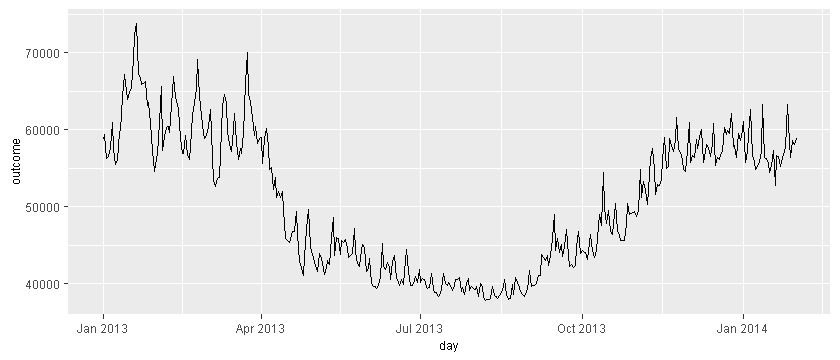

In [3]:
ggplot(data) + geom_line(aes(x=day, y=outcome))

### Classical Approach

Prediction by the classical method uses one model to predict various numbers of time steps ahead of a static viewpoint.  It treats the time variable as a numeric variable.

#### Prepare Time Series Data

Here we add a synthetic numeric variable corresponding to the time variable.  The data's earliest time coincides with numeric value 1.

In [4]:
datax = data

In [5]:
datax$step = as.numeric(data$day)-15705
datax = datax[,c(1,3,2)]

size(datax)
datax

observations,variables
396,3


day,step,outcome
2013-01-01,1,58713.65
2013-01-02,2,59471.86
2013-01-03,3,56288.03
2013-01-04,4,56493.22
2013-01-05,5,57717.88
2013-01-06,6,61021.22
2013-01-07,7,57471.34
2013-01-08,8,55542.50
2013-01-09,9,56025.00
2013-01-10,10,59837.13


#### Partition Time Series Data for Training & Testing

Training data must comprise a sequence of observations corresponding to adjecent time steps.

Testing data must comprise a sequence of observations corresponding to adjecent time steps.

Here training data is for one year January 1, 2013 through December 31, 2013.  Testing data is for one month January 1, 2014 through January 31, 2014.

In [6]:
datax.train = datax[datax$day <= "2013-12-31", ]
datax.test = datax[datax$day >= "2014-01-01", ]

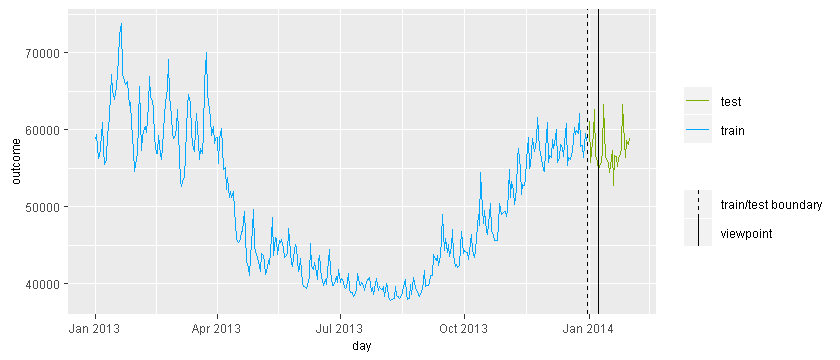

In [7]:
ggplot() +
geom_line(aes(x=day, y=outcome, color="train"), data=datax.train) +
geom_line(aes(x=day, y=outcome, color="test"), data=datax.test) +
geom_vline(aes(xintercept=as.Date("2013-12-31"), linetype="train/test boundary"), lwd=0.2) +
geom_vline(aes(xintercept=as.Date("2014-01-08"), linetype="viewpoint"), lwd=0.2) +
scale_color_manual(values=PALETTE[c(3,1)]) +
scale_linetype_manual(values=c("dashed","solid"))

#### Model

Here we construct a linear regression model (with 4th degree polynomial transformation) to predict outcome given a time step.

In [8]:
model = lm(outcome ~ poly(step, 4, raw=TRUE), datax.train)
data.frame(model$coefficients)

,model.coefficients
(Intercept),59531.4166260292
"poly(step, 4, raw = TRUE)1",242.7584252609
"poly(step, 4, raw = TRUE)2",-5.0708038387
"poly(step, 4, raw = TRUE)3",0.0222099086
"poly(step, 4, raw = TRUE)4",-0.0000277999


#### Prediction

Here we choose a viewpoint of day 373 (2014-01-08).

In [9]:
viewpoint = datax.test$step[datax.test$day=="2014-01-08"]
data.frame(viewpoint)

viewpoint
373


Use the model to predict outcome 1, 2, 3 days ahead of the viewpoint.

In [10]:
datax.test$outcome.predicted = c(rep(NA,8), predict(model, data.frame(step=viewpoint+c(1,2,3))), rep(NA,20))
datax.test %>% fmt

day,step,outcome,outcome.predicted
2014-01-01,366,61084.10,NA
2014-01-02,367,55752.44,NA
2014-01-03,368,57175.36,NA
2014-01-04,369,59471.32,NA
2014-01-05,370,62683.80,NA
2014-01-06,371,56635.26,NA
2014-01-07,372,55872.08,NA
2014-01-08,373,54807.42,NA
2014-01-09,374,55200.95,59006.82
2014-01-10,375,55887.59,58955.77


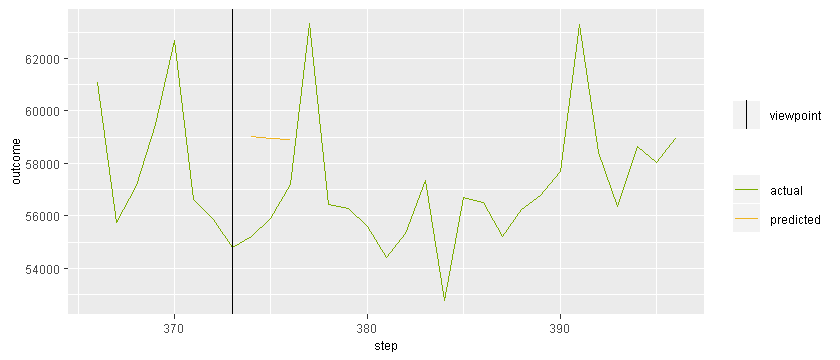

In [11]:
ggplot(datax.test) +
geom_line(aes(x=step, y=outcome, color="actual")) +
geom_line(aes(x=step, y=outcome.predicted, color="predicted"), na.rm=TRUE) +
geom_vline(aes(xintercept=viewpoint, linetype="viewpoint"), lwd=0.2) +
scale_color_manual(values=PALETTE[c(3,5)]) +
scale_linetype_manual(values="solid")

### Direct Approach

The direct approach uses several models to predict various numbers of time steps ahead of a static viewpoint.  

#### Partition Time Series Data for Training & Testing

In [12]:
datax.train = data[data$day <= "2013-12-31", ]
datax.test = data[data$day >= "2014-01-01", ]

#### Further Prepare Training Data: Convert from Time Series Form to Cross-Sectional Form

Time series data can be converted to cross-sectional data, given a set of **lookbacks** and a set of **lookaheads**.

Here we choose these lookbacks and lookaheads:
* lookbacks: 0, 1, 2, 3, 4, 5, 6, 7 days
* lookaheads: 1, 2, 3 days (3 day horizon starting at 1 day ahead)

Add synthetic variables for lookbacks.  For each lookback, add a variable that aligns with the outcome variable shifted **up** by the appropriate number of days.

In [13]:
datax.train.cs = datax.train
datax.train.cs$lookback.1 = shift_up(datax.train.cs$outcome, 1)
datax.train.cs$lookback.2 = shift_up(datax.train.cs$outcome, 2)
datax.train.cs$lookback.3 = shift_up(datax.train.cs$outcome, 3)
datax.train.cs$lookback.4 = shift_up(datax.train.cs$outcome, 4)
datax.train.cs$lookback.5 = shift_up(datax.train.cs$outcome, 5)
datax.train.cs$lookback.6 = shift_up(datax.train.cs$outcome, 6)
datax.train.cs$lookback.7 = shift_up(datax.train.cs$outcome, 7)

size(datax.train.cs)
datax.train.cs

observations,variables
365,9


day,outcome,lookback.1,lookback.2,lookback.3,lookback.4,lookback.5,lookback.6,lookback.7
2013-01-01,58713.65,NA,NA,NA,NA,NA,NA,NA
2013-01-02,59471.86,58713.65,NA,NA,NA,NA,NA,NA
2013-01-03,56288.03,59471.86,58713.65,NA,NA,NA,NA,NA
2013-01-04,56493.22,56288.03,59471.86,58713.65,NA,NA,NA,NA
2013-01-05,57717.88,56493.22,56288.03,59471.86,58713.65,NA,NA,NA
2013-01-06,61021.22,57717.88,56493.22,56288.03,59471.86,58713.65,NA,NA
2013-01-07,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,58713.65,NA
2013-01-08,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,58713.65
2013-01-09,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86
2013-01-10,59837.13,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03


Add synthetic variables for lookaheads.  For each lookahead, add a variable that aligns with the outcome variable shifted **down** by the appropriate number of days.

In [14]:
datax.train.cs$lookahead.1 = shift_down(datax.train.cs$outcome, 1)
datax.train.cs$lookahead.2 = shift_down(datax.train.cs$outcome, 2)
datax.train.cs$lookahead.3 = shift_down(datax.train.cs$outcome, 3)

size(datax.train.cs)
datax.train.cs

observations,variables
365,12


day,outcome,lookback.1,lookback.2,lookback.3,lookback.4,lookback.5,lookback.6,lookback.7,lookahead.1,lookahead.2,lookahead.3
2013-01-01,58713.65,NA,NA,NA,NA,NA,NA,NA,59471.86,56288.03,56493.22
2013-01-02,59471.86,58713.65,NA,NA,NA,NA,NA,NA,56288.03,56493.22,57717.88
2013-01-03,56288.03,59471.86,58713.65,NA,NA,NA,NA,NA,56493.22,57717.88,61021.22
2013-01-04,56493.22,56288.03,59471.86,58713.65,NA,NA,NA,NA,57717.88,61021.22,57471.34
2013-01-05,57717.88,56493.22,56288.03,59471.86,58713.65,NA,NA,NA,61021.22,57471.34,55542.50
2013-01-06,61021.22,57717.88,56493.22,56288.03,59471.86,58713.65,NA,NA,57471.34,55542.50,56025.00
2013-01-07,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,58713.65,NA,55542.50,56025.00,59837.13
2013-01-08,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,58713.65,56025.00,59837.13,59899.84
2013-01-09,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,59837.13,59899.84,64331.53
2013-01-10,59837.13,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59899.84,64331.53,67181.27


Discard incomplete observations.

Here we discard the last 3 days and first 7 days of train data.  The last 3 days are discarded cause they do not include 3 day lookaheads.  The first 7 days are discarded because they do not include 7 day lookbacks.  

In [15]:
datax.train.csx = datax.train.cs[1:(nrow(datax.train.cs)-3), ]
datax.train.csx = datax.train.csx[(7+1):nrow(datax.train.csx), ]

size(datax.train.csx)
datax.train.csx %>% fmt

observations,variables
355,12


day,outcome,lookback.1,lookback.2,lookback.3,lookback.4,lookback.5,lookback.6,lookback.7,lookahead.1,lookahead.2,lookahead.3
2013-01-08,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,58713.65,56025.00,59837.13,59899.84
2013-01-09,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,59837.13,59899.84,64331.53
2013-01-10,59837.13,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59899.84,64331.53,67181.27
2013-01-11,59899.84,59837.13,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,64331.53,67181.27,65087.37
2013-01-12,64331.53,59899.84,59837.13,56025.00,55542.50,57471.34,61021.22,57717.88,67181.27,65087.37,63969.29
2013-01-13,67181.27,64331.53,59899.84,59837.13,56025.00,55542.50,57471.34,61021.22,65087.37,63969.29,64918.72
2013-01-14,65087.37,67181.27,64331.53,59899.84,59837.13,56025.00,55542.50,57471.34,63969.29,64918.72,65561.24
2013-01-15,63969.29,65087.37,67181.27,64331.53,59899.84,59837.13,56025.00,55542.50,64918.72,65561.24,69206.19
2013-01-16,64918.72,63969.29,65087.37,67181.27,64331.53,59899.84,59837.13,56025.00,65561.24,69206.19,72263.79
2013-01-17,65561.24,64918.72,63969.29,65087.37,67181.27,64331.53,59899.84,59837.13,69206.19,72263.79,73890.93


#### Model

Build several models, one for each lookahead.

Here we use the linear regression method to build all 3 models:
* Model #1 will predict outcome at 1 time step ahead of the viewpoint given outcomes at the viewpoint and across the past 7 time steps.
* Model #2 will predict outcome at 2 time steps ahead of the viewpoint given outcomes at the viewpoint and across the past 7 time steps.
* Model #3 will predict outcome at 3 time steps ahead of the viewpoint given outcomes at the viewpoint and across the past 7 time steps.

In [16]:
model.1 = lm(lookahead.1 ~ outcome+lookback.1+lookback.2+lookback.3+lookback.4+lookback.5+lookback.6+lookback.7, datax.train.csx)
model.2 = lm(lookahead.2 ~ outcome+lookback.1+lookback.2+lookback.3+lookback.4+lookback.5+lookback.6+lookback.7, datax.train.csx)
model.3 = lm(lookahead.3 ~ outcome+lookback.1+lookback.2+lookback.3+lookback.4+lookback.5+lookback.6+lookback.7, datax.train.csx)

#### Prepare View

Here we prepare a view at viewpoint 2014-01-08.  Note, we reserve the first 7 days of test data for lookbacks.

In [17]:
viewpoint = as.Date("2014-01-08")

view = datax.test[datax.test$day==viewpoint,]

view$lookback.1 = datax.test$outcome[datax.test$day==viewpoint-1]
view$lookback.2 = datax.test$outcome[datax.test$day==viewpoint-2]
view$lookback.3 = datax.test$outcome[datax.test$day==viewpoint-3]
view$lookback.4 = datax.test$outcome[datax.test$day==viewpoint-4]
view$lookback.5 = datax.test$outcome[datax.test$day==viewpoint-5]
view$lookback.6 = datax.test$outcome[datax.test$day==viewpoint-6]
view$lookback.7 = datax.test$outcome[datax.test$day==viewpoint-7]

view %>% fmt

day,outcome,lookback.1,lookback.2,lookback.3,lookback.4,lookback.5,lookback.6,lookback.7
2014-01-08,54807.42,55872.08,56635.26,62683.8,59471.32,57175.36,55752.44,61084.1


#### Prediction

* Use Model #1 to predict outcome at 1 day ahead of the viewpoint.
* Use Model #2 to predict outcome at 2 days ahead of the viewpoint.
* Use Model #3 to predict outcome at 3 days ahead of the viewpoint.

In [18]:
prediction.1 = predict(model.1, view)
prediction.2 = predict(model.2, view)
prediction.3 = predict(model.3, view)

datax.test$outcome.predicted = c(rep(NA,8), prediction.1, prediction.2, prediction.3, rep(NA,20))
datax.test %>% fmt

day,outcome,outcome.predicted
2014-01-01,61084.10,NA
2014-01-02,55752.44,NA
2014-01-03,57175.36,NA
2014-01-04,59471.32,NA
2014-01-05,62683.80,NA
2014-01-06,56635.26,NA
2014-01-07,55872.08,NA
2014-01-08,54807.42,NA
2014-01-09,55200.95,53107.74
2014-01-10,55887.59,53906.82


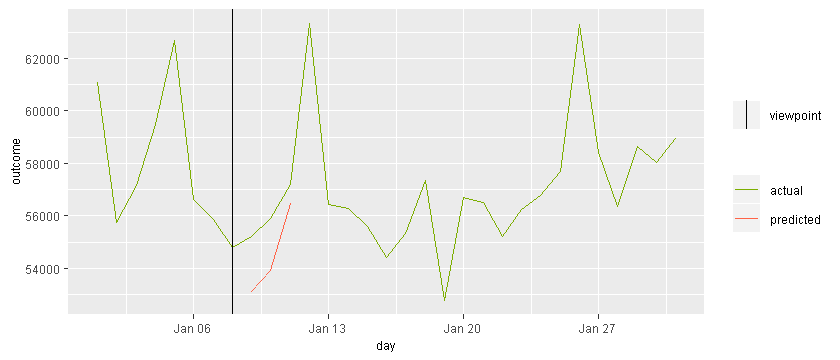

In [19]:
ggplot(datax.test) +
geom_line(aes(x=day, y=outcome, color="actual")) +
geom_line(aes(x=day, y=outcome.predicted, color="predicted"), na.rm=TRUE) +
geom_vline(aes(xintercept=as.Date("2014-01-08"), linetype="viewpoint"), lwd=0.2) +
scale_color_manual(values=PALETTE[c(3,2)]) +
scale_linetype_manual(values="solid")

### Recursive Approach

The recursive approach re-uses one model to predict one time step ahead of a moving viewpoint based on previous predictions.

#### Partition Time Series Data for Training & Testing

In [20]:
datax.train = data[data$day <= "2013-12-31", ]
datax.test = data[data$day >= "2014-01-01", ]

#### Further Prepare Training Data: Convert from Time Series Form to Cross-Sectional Form

Here we choose these lookbacks and lookaheads:
* lookbacks: 0, 1, 2, 3, 4, 5, 6, 7 days
* lookaheads: 1, 2, 3 days (3 day horizon starting at 1 day ahead)

In [21]:
datax.train.cs = datax.train
datax.train.cs$lookback.1 = shift_up(datax.train.cs$outcome, 1)
datax.train.cs$lookback.2 = shift_up(datax.train.cs$outcome, 2)
datax.train.cs$lookback.3 = shift_up(datax.train.cs$outcome, 3)
datax.train.cs$lookback.4 = shift_up(datax.train.cs$outcome, 4)
datax.train.cs$lookback.5 = shift_up(datax.train.cs$outcome, 5)
datax.train.cs$lookback.6 = shift_up(datax.train.cs$outcome, 6)
datax.train.cs$lookback.7 = shift_up(datax.train.cs$outcome, 7)

datax.train.cs$lookahead.1 = shift_down(datax.train.cs$outcome, 1)
datax.train.cs$lookahead.2 = shift_down(datax.train.cs$outcome, 2)
datax.train.cs$lookahead.3 = shift_down(datax.train.cs$outcome, 3)

datax.train.csx = datax.train.cs[1:(nrow(datax.train.cs)-3), ]
datax.train.csx = datax.train.csx[(7+1):nrow(datax.train.csx), ]

size(datax.train.csx)
datax.train.csx %>% fmt

observations,variables
355,12


day,outcome,lookback.1,lookback.2,lookback.3,lookback.4,lookback.5,lookback.6,lookback.7,lookahead.1,lookahead.2,lookahead.3
2013-01-08,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,58713.65,56025.00,59837.13,59899.84
2013-01-09,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59471.86,59837.13,59899.84,64331.53
2013-01-10,59837.13,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,56288.03,59899.84,64331.53,67181.27
2013-01-11,59899.84,59837.13,56025.00,55542.50,57471.34,61021.22,57717.88,56493.22,64331.53,67181.27,65087.37
2013-01-12,64331.53,59899.84,59837.13,56025.00,55542.50,57471.34,61021.22,57717.88,67181.27,65087.37,63969.29
2013-01-13,67181.27,64331.53,59899.84,59837.13,56025.00,55542.50,57471.34,61021.22,65087.37,63969.29,64918.72
2013-01-14,65087.37,67181.27,64331.53,59899.84,59837.13,56025.00,55542.50,57471.34,63969.29,64918.72,65561.24
2013-01-15,63969.29,65087.37,67181.27,64331.53,59899.84,59837.13,56025.00,55542.50,64918.72,65561.24,69206.19
2013-01-16,64918.72,63969.29,65087.37,67181.27,64331.53,59899.84,59837.13,56025.00,65561.24,69206.19,72263.79
2013-01-17,65561.24,64918.72,63969.29,65087.37,67181.27,64331.53,59899.84,59837.13,69206.19,72263.79,73890.93


#### Model

Build a model to predict 1 one time step ahead.

Here we use the linear regression method to build 1 model:
* Model will predict outcome at 1 time step ahead of the viewpoint given outcomes at the viewpoint and across the past 7 time steps.

In [22]:
model = lm(lookahead.1 ~ outcome+lookback.1+lookback.2+lookback.3+lookback.4+lookback.5+lookback.6+lookback.7, datax.train.csx)

#### Prepare Views & Predictions

Here we prepare views starting at viewpoint 2014-01-08.  Note, we reserve the first 7 days of test data for lookbacks.

In [23]:
viewpoint.0 = as.Date("2014-01-08")

view.0 = datax.test[datax.test$day==viewpoint.0,]

view.0$lookback.1 = datax.test$outcome[datax.test$day==viewpoint.0-1]
view.0$lookback.2 = datax.test$outcome[datax.test$day==viewpoint.0-2]
view.0$lookback.3 = datax.test$outcome[datax.test$day==viewpoint.0-3]
view.0$lookback.4 = datax.test$outcome[datax.test$day==viewpoint.0-4]
view.0$lookback.5 = datax.test$outcome[datax.test$day==viewpoint.0-5]
view.0$lookback.6 = datax.test$outcome[datax.test$day==viewpoint.0-6]
view.0$lookback.7 = datax.test$outcome[datax.test$day==viewpoint.0-7]

view.0 %>% fmt

day,outcome,lookback.1,lookback.2,lookback.3,lookback.4,lookback.5,lookback.6,lookback.7
2014-01-08,54807.42,55872.08,56635.26,62683.8,59471.32,57175.36,55752.44,61084.1


Predict outcome at 1 time step ahead of current viewpoint.

In [24]:
prediction.1 = predict(model, view.0)
prediction.1 %>% fmt

prediction.1
53107.74


Prepare a new view (1 time step ahead of the original viewpoint).

Here we prepare a new view at viewpoint 2014-01-09.  Use the previous outcome prediction as the outcome at this new viewpoint.

In [25]:
viewpoint.1 = viewpoint.0 + 1

view.1 = datax.test[datax.test$day==viewpoint.1,"day", drop=FALSE]

view.1$outcome = prediction.1

view.1$lookback.1 = datax.test$outcome[datax.test$day==viewpoint.1-1]
view.1$lookback.2 = datax.test$outcome[datax.test$day==viewpoint.1-2]
view.1$lookback.3 = datax.test$outcome[datax.test$day==viewpoint.1-3]
view.1$lookback.4 = datax.test$outcome[datax.test$day==viewpoint.1-4]
view.1$lookback.5 = datax.test$outcome[datax.test$day==viewpoint.1-5]
view.1$lookback.6 = datax.test$outcome[datax.test$day==viewpoint.1-6]
view.1$lookback.7 = datax.test$outcome[datax.test$day==viewpoint.1-7]

view.1 %>% fmt

day,outcome,lookback.1,lookback.2,lookback.3,lookback.4,lookback.5,lookback.6,lookback.7
2014-01-09,53107.74,54807.42,55872.08,56635.26,62683.8,59471.32,57175.36,55752.44


Predict outcome at 1 day ahead of the new viewpoint, using the model given the previous outcome prediction and the earlier 6 days of test data.

In [26]:
prediction.2 = predict(model, view.1)
prediction.2 %>% fmt

prediction.2
53803.4


Prepare a 2nd new viewpoint (2 days ahead of the original viewpoint).

Here we prepare a new view at viewpoint 2014-01-10.  Use the previous 2 outcome predictions as the outcome and 1 time step lookback at this new viewpoint.

In [27]:
viewpoint.2 = viewpoint.1 + 1

view.2 = datax.test[datax.test$day==viewpoint.2,"day", drop=FALSE]

view.2$outcome = prediction.2

view.2$lookback.1 = prediction.1
view.2$lookback.2 = datax.test$outcome[datax.test$day==viewpoint.2-2]
view.2$lookback.3 = datax.test$outcome[datax.test$day==viewpoint.2-3]
view.2$lookback.4 = datax.test$outcome[datax.test$day==viewpoint.2-4]
view.2$lookback.5 = datax.test$outcome[datax.test$day==viewpoint.2-5]
view.2$lookback.6 = datax.test$outcome[datax.test$day==viewpoint.2-6]
view.2$lookback.7 = datax.test$outcome[datax.test$day==viewpoint.2-7]

view.2 %>% fmt

day,outcome,lookback.1,lookback.2,lookback.3,lookback.4,lookback.5,lookback.6,lookback.7
2014-01-10,53803.4,53107.74,54807.42,55872.08,56635.26,62683.8,59471.32,57175.36


Predict outcome at 1 day ahead of 2nd new viewpoint, using the model given the previous 2 outcome predictions and the earlier 5 days of test data.

In [28]:
prediction.3 = predict(model, view.2)
prediction.3 %>% fmt

prediction.3
55757.06


Compile the outcome predictions.

In [29]:
datax.test$outcome.predicted = c(rep(NA,8), prediction.1, prediction.2, prediction.3, rep(NA,20))
datax.test %>% fmt

day,outcome,outcome.predicted
2014-01-01,61084.10,NA
2014-01-02,55752.44,NA
2014-01-03,57175.36,NA
2014-01-04,59471.32,NA
2014-01-05,62683.80,NA
2014-01-06,56635.26,NA
2014-01-07,55872.08,NA
2014-01-08,54807.42,NA
2014-01-09,55200.95,53107.74
2014-01-10,55887.59,53803.40


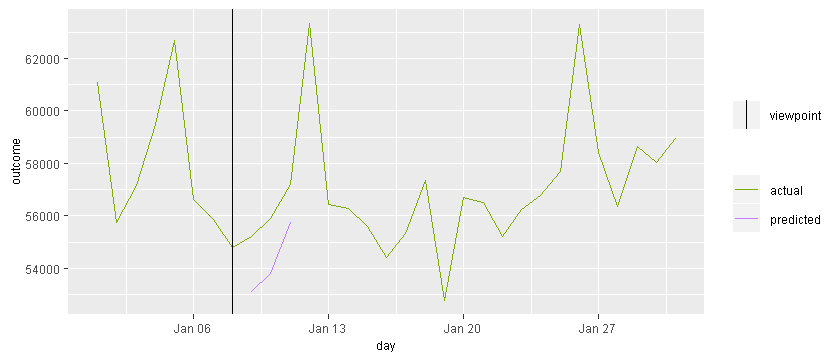

In [30]:
ggplot(datax.test) +
geom_line(aes(x=day, y=outcome, color="actual")) +
geom_line(aes(x=day, y=outcome.predicted, color="predicted"), na.rm=TRUE) +
geom_vline(aes(xintercept=as.Date("2014-01-08"), linetype="viewpoint"), lwd=0.2) +
scale_color_manual(values=PALETTE[c(3,4)]) +
scale_linetype_manual(values="solid")

## Code

In [31]:
# shift_up # provided in apparatus code cell above
# shift_down # provided in apparatus code cell above

# help(as.Date, package="base")

## Expectations

Know about this:
* How to convert data in time series form to cross-sectional form, given a set of lookbacks and a set of lookaheads, conceptually and using R.
* How to build models and predict future outcomes over a horizon, using direct approach, conceptually and using R.
* How to build a model and predict future outcomes over a horizon, using recursive method, conceptually and using R.

## Further Reading

* Further reading coming soon ...

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised August 29, 2019
</span>
</p>